# Guitar tuner

-The aim of this practical work (TP) is to program a guitar tuner algorithm of a musical signal played with guitar. We will determine the fundamental frequency of a given single notes, then we will identify the note played. 

-The guitar notes and corresponding frequencies are :

* E1 : 329.63 Hz
* B2 : 246.94 Hz
* G3 : 196.00 Hz
* D4 : 146.83 Hz
* A5 : 110.00 Hz
* E6 : 82.41 Hz

-The units of tuning accuracy are cents. The values of 1 cent for accuracy of each string are : 0.15, 0.15, 0.15, 0.08, 0.08, 0.04.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile 
from pydub import AudioSegment
from pylab import copy
from scipy.fftpack import fftshift, fft

In [2]:
import sys
print(sys.version)

3.6.3 |Anaconda, Inc.| (default, Oct 13 2017, 12:02:49) 
[GCC 7.2.0]


## Spectral Analysis

In the first part, I defined a function that determine the power spectrum of the signal. In the second part, I construted two different functions which determinize the fundamental frequency.


### Power spectrum of the signal

In [3]:
def power_spectrum(data,Fs):
       
    data_fft = fft(data)
    
    Freq = np.linspace(0,Fs/2,len(data_fft)/2)
    data_spectrum = np.fft.fftshift(abs(data_fft)**2)[len(data_fft)//2:]

    # visualization of the signal (temporal domain)
    plt.figure(1)
    plt.plot(np.linspace(0,sound.duration_seconds,len(data)),data)
    plt.title("Signal")
    plt.show()
    
    # visualization of the power spectrum of the signal
    #plt.figure(2)
    #plt.plot(Freq,data_spectrum)
    #plt.title('Power spectrum of the signal')
    #plt.show()

    return(data_spectrum,Freq)

### First Method

Spectrum contains energy mostly at integer multiples of the fundamental frequency. The idea of this method is to search about the interval of frequencies that gives the maximum of energy and then calculate the fundamental frequency as the frequency of the maximum value of the spectrum in this interval. This method works well, it identify the played accurate to within +/-3 cents.

In [4]:
def fundamental_frequency_Method_1(data_spectrum,Freq):
    
    # we compute the frequency corrresponding to the maximum value of the power spectrum
    fmax = Freq[np.argmax(data_spectrum)]
    
    # we only consider the frequencies that are smaller than "fmax"
    Data_spectrum = data_spectrum[Freq<fmax]
    
    # we compute the value of index corresponding to the maximum value of 
    # the new power spectrum ( which only consider frequencies that are smaller than "fmax")
    n= np.argmax(Data_spectrum)
    
    # determination of the fundamental frequency : we search the largest 
    # power/amplitude within Magnitude and its index in the array
    # we choose an interval composed of "nbr" points, we calculate the integral 
    # of power spectrum function among this interval. we chose the interval giving the maximum
    # value of integral. and then we choose the frequency corresponding to the maximum of the
    # power spectrum function in this interval
    
    nbr = 25 #number of points of the interval
    summ=0 # 
    
    while n>10:
        aux = 0
        j = n- nbr
    
        # calculate the integral of power spectrum among the interval = [j, n]
        for i in range(j,n+1):
            aux = aux +  Data_spectrum[i]
            
        if aux > summ:
            summ = aux 
            jj = j 
            nn = n
            
        n =n -1   # to translate the interval

    imax= np.argmax(Data_spectrum[jj:nn+1])+jj # index of the fundamental frequency
    
    fe = Freq[imax] #fundamental frequency
    
    return fe

### Second method

In [5]:
def fundamental_frequency_Method_2(data_spectrum, Freq):
    """
    Estimate frequency using harmonic product spectrum (HPS)
    """

    # harmonic product spectrum:
    # We downsample the power spectrum for "N" time, multiply all downsampled 
    # and at the end, we find the peak
    N = 10
    L = len(data_spectrum[::N]) 
    y = data_spectrum[:L].copy()
    
    for x in range(2, N+1):
        y *=  data_spectrum[::x][:L]
        
    Freq = Freq[:L]
    
    fe = np.abs(Freq[np.argmax(y)])
    
    return(fe)

## Identification of the played note 


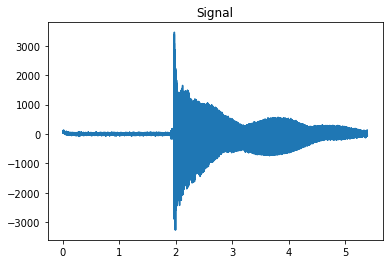

In [6]:
# Loading the audio file
sound = AudioSegment.from_mp3("string1.mp3")
sound.export("string1.wav", format="wav")
Fs, data = wavfile.read('string1.wav') # load the data

if sound.channels == 2 :
    data = data[:,0]
# Spectral analysis   
data_spectrum, Freq = power_spectrum(data,Fs)
# fundamental frequency 
fe = fundamental_frequency_Method_1(data_spectrum, Freq)
#fe = fundamental_frequency_Method_2(data_spectrum, Freq)

In [7]:
# maximum number cent of accuracy
Ncent= 5

# identification of the played note accurate to within +/-5 cents.
if fe >= 329.63 - 0.15 * Ncent and fe <= 329.63 + 0.15 * Ncent :
    accuracy = np.abs(fe -329.63)/0.15
    print("The played note is E1 with the accuracy in cent ", accuracy, ".")
    
elif fe >= 246.94 - 0.15 * Ncent and fe <= 246.94 + 0.15 * Ncent :
    accuracy = np.abs(fe -246.94)/0.15
    print("The played note is B2 with the accuracy in cent ", accuracy, ".")

elif fe >= 196.00 - 0.15 * Ncent and fe <= 196.00  + 0.15 * Ncent :
    accuracy = np.abs(fe -196.00 )/0.15
    print("The played note is G3 with the accuracy in cent ", accuracy, ".")
    
elif fe >= 146.83 - 0.08 * Ncent and fe <= 146.83  + 0.08 * Ncent :
    accuracy = np.abs(fe -146.83 )/0.08
    print("The played note is D4 with the accuracy in cent ", accuracy, ".")
    
elif fe >= 110.00 - 0.08 * Ncent and fe <= 110.00  + 0.08 * Ncent :
    accuracy = np.abs(fe -110.00 )/0.08
    print("The played note is A5 with the accuracy in cent ", accuracy, ".")
    
elif fe >= 82.41  - 0.08 * Ncent and fe <= 82.41   + 0.08 * Ncent :
    accuracy = np.abs(fe -82.41  )/0.08
    print("The played note is E6 with the accuracy in cent ", accuracy, ".")

else :
    print("The played note isn't accurate to within +/-"+ str(Ncent)+" cents.")


The played note is E1 with the accuracy in cent  0.8806136680611114 .
